# **Automating Crypto Website API Pull Using Python**

## **1. Importing Necessary Libraries**


In [23]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from time import sleep

## **2. Configuring Display Options**

In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## **3. API Configuration**

In [25]:
API_KEY = 'your-api-key-here'  # Replace with your own API key
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {'start': '1', 'limit': '15', 'convert': 'USD'}
headers = {'Accepts': 'application/json', 'X-CMC_PRO_API_KEY': API_KEY}

## **4. Fetching Data from API**

In [26]:
session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(f"Error fetching data: {e}")


## **5. Flattening JSON Data into DataFrame**


In [27]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

# Display first few rows
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11971,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19834334.00000,19834334.00000,False,NaN,1,NaN,NaN,None,2025-03-09T08:25:00.000Z,85916.95552,14554952534.46697,-71.59600,-0.09974,-0.23408,0.13060,-11.23136,-10.28696,-13.78599,1704105592062.76147,60.28290,1804256065936.87012,None,2025-03-09T08:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-09 10:26:03.316776
1,1027,Ethereum,ETH,ethereum,9963,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120602331.49746,120602331.49746,True,NaN,2,NaN,NaN,None,2025-03-09T08:24:00.000Z,2185.32916,9610790688.23632,-47.46620,0.01667,2.65673,-1.36850,-19.65085,-35.05800,-44.15047,263555791377.11423,9.32660,263555791377.10999,None,2025-03-09T08:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-09 10:26:03.316776
2,825,Tether USDt,USDT,tether,118711,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,142799794449.01764,144556334099.41824,True,NaN,3,NaN,NaN,None,2025-03-09T08:24:00.000Z,0.99976,40151577768.05129,-54.41830,0.01578,-0.01249,0.01758,-0.06612,0.00790,-0.04302,142765624723.05127,5.05210,144521744061.37000,None,2025-03-09T08:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-09 10:26:03.316776
3,52,XRP,XRP,xrp,1547,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58043299826.00000,99986368206.00000,False,NaN,4,NaN,NaN,None,2025-03-09T08:25:00.000Z,2.33570,3009634561.88260,-60.60630,0.00655,-0.60209,3.03026,1.92585,0.84402,-3.91775,135571487897.48682,4.79750,233569573583.67999,None,2025-03-09T08:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-09 10:26:03.316776
4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142475465.82000,142475465.82000,False,NaN,5,NaN,NaN,None,2025-03-09T08:25:00.000Z,585.15575,1103122554.68674,-35.01480,0.09559,-1.80974,-4.02521,0.57886,-16.32733,-18.65236,83370337523.57921,2.95030,83370337523.58000,None,2025-03-09T08:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-09 10:26:03.316776


## **6. Function to Automate API Calls**


In [28]:
def api_runner():
    global df
    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(f"Error fetching data: {e}")
        return

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')

    # Append new data to df
    df = pd.concat([df, df2], ignore_index=True)

## **7. Running API Calls in a Loop**


In [29]:
for i in range(5):  # Limited to 333 runs per day
    api_runner()
    print(f"API Runner iteration {i+1} completed")
    sleep(60)  # Sleep for 1 minute

API Runner iteration 1 completed
API Runner iteration 2 completed
API Runner iteration 3 completed
API Runner iteration 4 completed
API Runner iteration 5 completed


## **8. Analyzing Percent Change Data**


In [33]:
df3 = df.groupby('name', sort=False)[[
    'quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',
    'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
    'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'
]].mean()

df4 = df3.stack().to_frame(name='values').reset_index()
df4 = df4.rename(columns={'level_1': 'percent_change'})

df4['percent_change'] = df4['percent_change'].replace({
    'quote.USD.percent_change_1h': '1h',
    'quote.USD.percent_change_24h': '24h',
    'quote.USD.percent_change_7d': '7d',
    'quote.USD.percent_change_30d': '30d',
    'quote.USD.percent_change_60d': '60d',
    'quote.USD.percent_change_90d': '90d'
})
df4.head()

,name,percent_change,values
0,Bitcoin,1h,-0.13757
1,Bitcoin,24h,-0.23368
2,Bitcoin,7d,0.12586
3,Bitcoin,30d,-11.29220
4,Bitcoin,60d,-10.30574


## **9. Visualizing Percent Change Data**

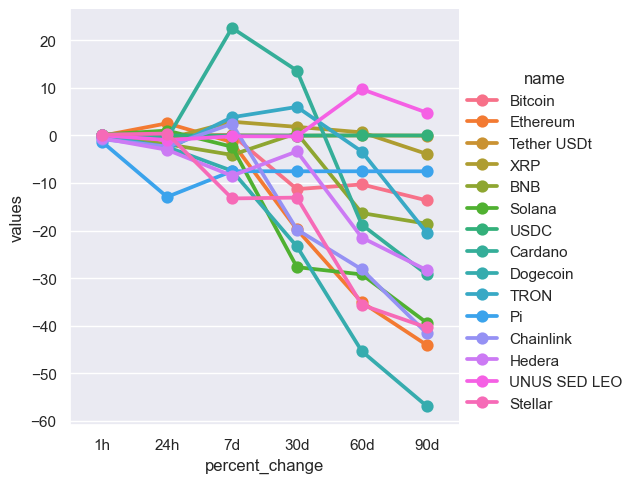

In [34]:
sns.catplot(x='percent_change', y='values', hue='name', data=df4, kind='point')
plt.show()

## **10. Analyzing Bitcoin Price Over Time**

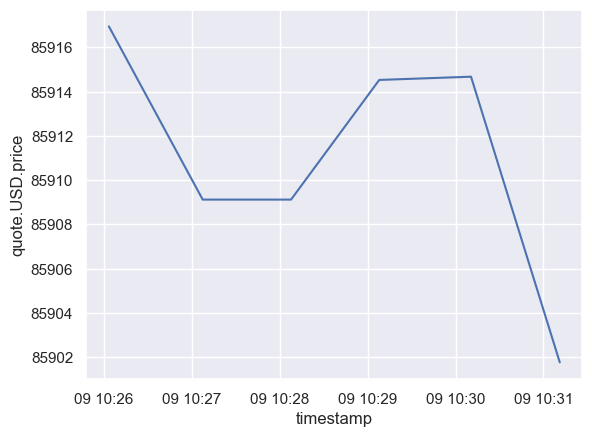

In [35]:
df5 = df[['name', 'quote.USD.price', 'timestamp']]
df5 = df5[df5['name'] == 'Bitcoin']

sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df5)
plt.show()